# EDA-Sugarcane-Production-Project


In [334]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [336]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [338]:
df.shape

(103, 7)

In [340]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# Data Cleaning

In [343]:
import pandas as pd

def clean_numeric_string(val):
    if isinstance(val, str):
        val = val.replace(",", "")  # remove all commas
        if val.count(".") > 1:
            parts = val.split(".")
            val = ''.join(parts[:-1]) + '.' + parts[-1]  # keep only the last dot
    return val

raw_columns = [
    "Production (Tons)",
    "Production per Person (Kg)",
    "Acreage (Hectare)",
    "Yield (Kg / Hectare)"
]

for col in raw_columns:
    df[col] = df[col].apply(clean_numeric_string)
    df[col] = pd.to_numeric(df[col], errors='coerce')  

\df.rename(columns={
    "Production (Tons)": "Production(Tons)",
    "Production per Person (Kg)": "Production_per_person(Kg)",
    "Acreage (Hectare)": "Acreage(Hectare)",
    "Yield (Kg / Hectare)": "Yield(Kg/Hectare)"
}, inplace=True)

df.dropna(subset=[
    "Production(Tons)", "Production_per_person(Kg)", "Acreage(Hectare)", "Yield(Kg/Hectare)"
], inplace=True)

df.reset_index(drop=True, inplace=True)


In [345]:
df = df.drop( "Unnamed: 0", axis = 1)


In [347]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

In [349]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678.382,3.668531,10226.205,75.1675
1,India,Asia,348448.000,260721.000000,4950.000,70.3935
2,China,Asia,123059.739,88287.000000,1675.215,73.4591
3,Thailand,Asia,87468.496,1.264303,1336.575,65.4422
4,Pakistan,Asia,65450.704,324219.000000,1130.820,57.8790


In [351]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [356]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             102
Yield(Kg/Hectare)            102
dtype: int64

# Univariate Analysis


In [358]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678.382,3.668531,10226.205,75.1675
1,India,Asia,348448.000,260721.000000,4950.000,70.3935
2,China,Asia,123059.739,88287.000000,1675.215,73.4591
3,Thailand,Asia,87468.496,1.264303,1336.575,65.4422
4,Pakistan,Asia,65450.704,324219.000000,1130.820,57.8790


**How many countries produce sugarcane from each continent?**

In [361]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

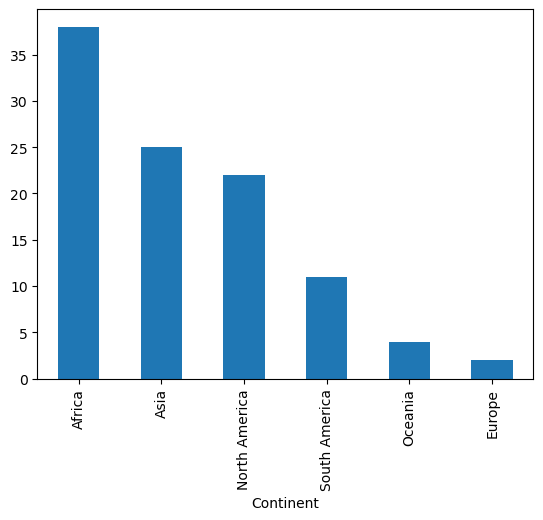

In [363]:
df['Continent'].value_counts().plot(kind='bar')

C:\Users\Infinix\AppData\Local\Temp\ipykernel_10100\2284553739.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\Infinix\AppData\Local\Temp\ipykernel_10100\2284553739.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_person(Kg)'])
C:\Users\

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

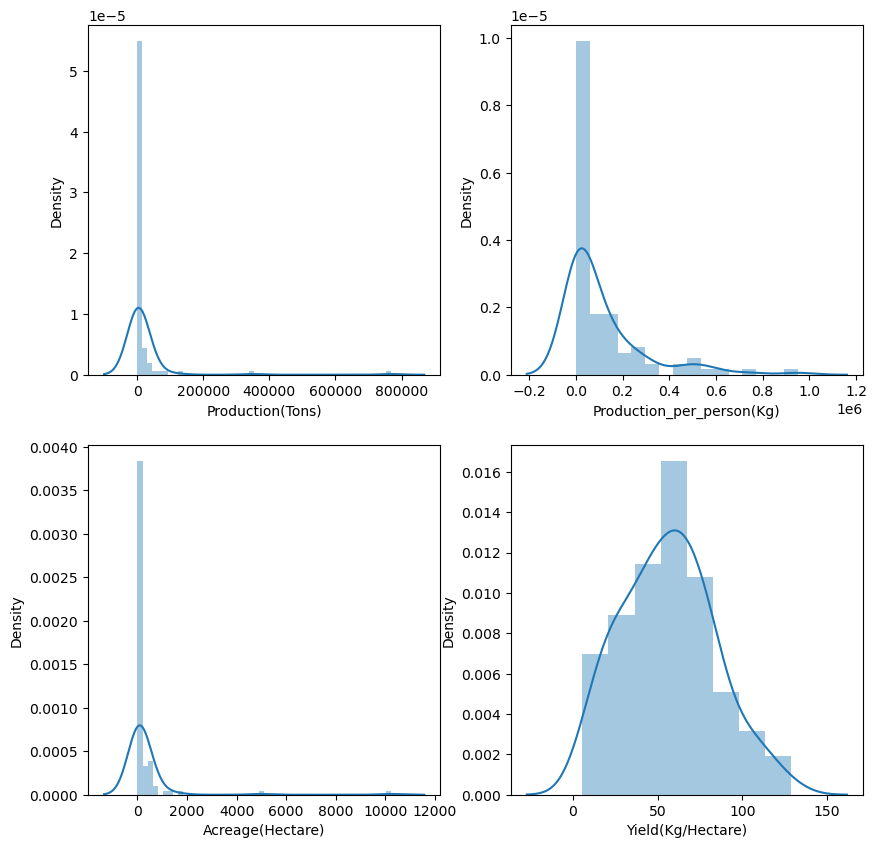

In [367]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

<Axes: ylabel='Yield(Kg/Hectare)'>

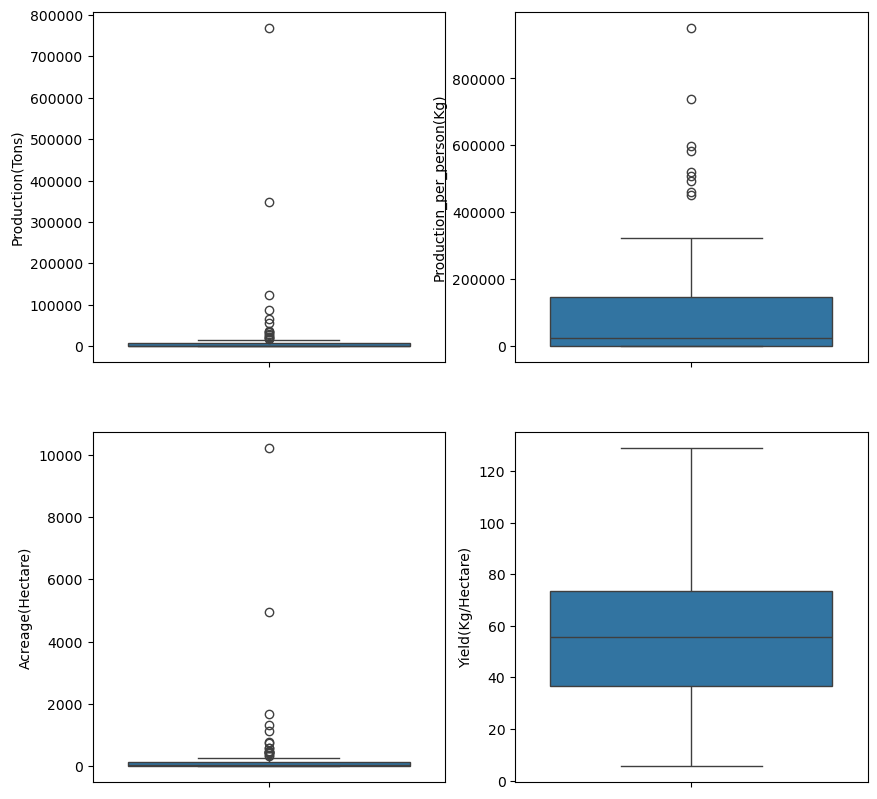

In [369]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

<Axes: ylabel='Production(Tons)'>

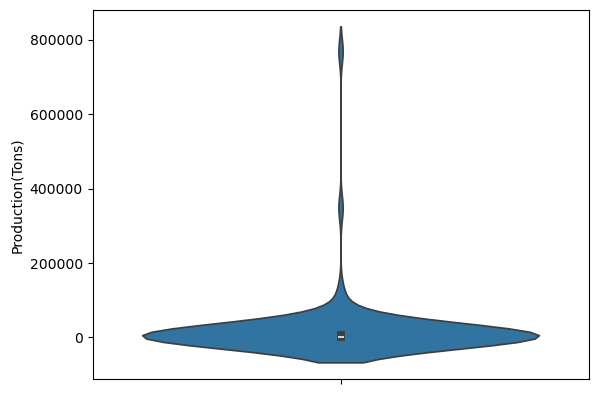

In [373]:
sns.violinplot(df["Production(Tons)"])

In [371]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,102.000000,102.000000,102.000000,102.000000
mean,18532.566402,112652.907671,296.808931,56.190931
std,84185.162016,176841.911118,1133.963002,27.569322
min,1.000000,0.000000,0.000000,5.577800
25%,166.757000,1304.000000,10.583000,36.809325
50%,1440.044000,25572.500000,51.238500,55.679950
75%,6426.823750,146384.750000,136.754250,73.706675
max,768678.382000,951087.000000,10226.205000,129.049300


# Bivariate Analysis


In [376]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678.382,3.668531,10226.205,75.1675
1,India,Asia,348448.000,260721.000000,4950.000,70.3935
2,China,Asia,123059.739,88287.000000,1675.215,73.4591
3,Thailand,Asia,87468.496,1.264303,1336.575,65.4422
4,Pakistan,Asia,65450.704,324219.000000,1130.820,57.8790


**Which country produces maximum sugarcane?**

In [379]:
df_new=df[["Country","Production(Tons)"]].set_index("Country")

In [381]:
df_new

,Production(Tons)
Country,
Brazil,768678.382
India,348448.000
China,123059.739
Thailand,87468.496
Pakistan,65450.704
...,...
Spain,394.000
Lebanon,97.000
Singapore,50.000


In [383]:
df_new['Production(Tons)_%'] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [385]:
df_new

,Production(Tons),Production(Tons)_%
Country,,
Brazil,768678.382,40.663891
India,348448.000,18.433264
China,123059.739,6.509989
Thailand,87468.496,4.627175
Pakistan,65450.704,3.462411
...,...,...
Spain,394.000,0.020843
Lebanon,97.000,0.005131
Singapore,50.000,0.002645


<Axes: ylabel='Production(Tons)_%'>

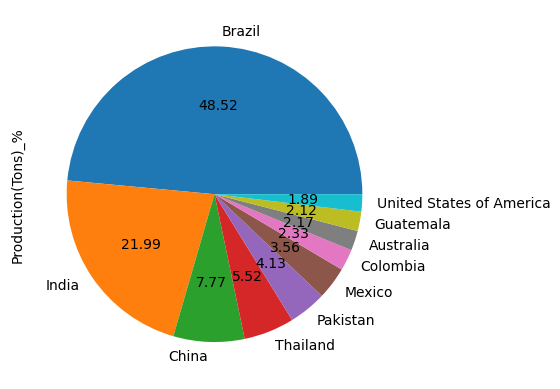

In [393]:
df_new['Production(Tons)_%'].head(10).plot(kind='pie',autopct='%.2f')

C:\Users\Infinix\AppData\Local\Temp\ipykernel_10100\685855668.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


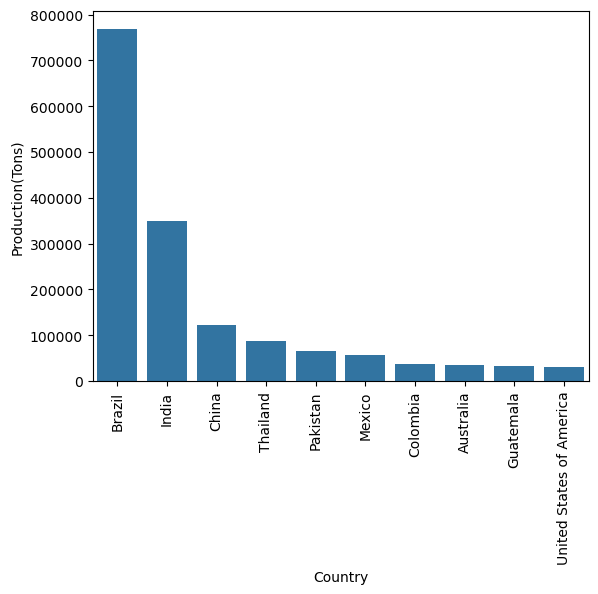

In [399]:
ax= sns.barplot(data=df.head(10), x='Country', y='Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

**Which country has highest land?**

C:\Users\Infinix\AppData\Local\Temp\ipykernel_10100\2973715568.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


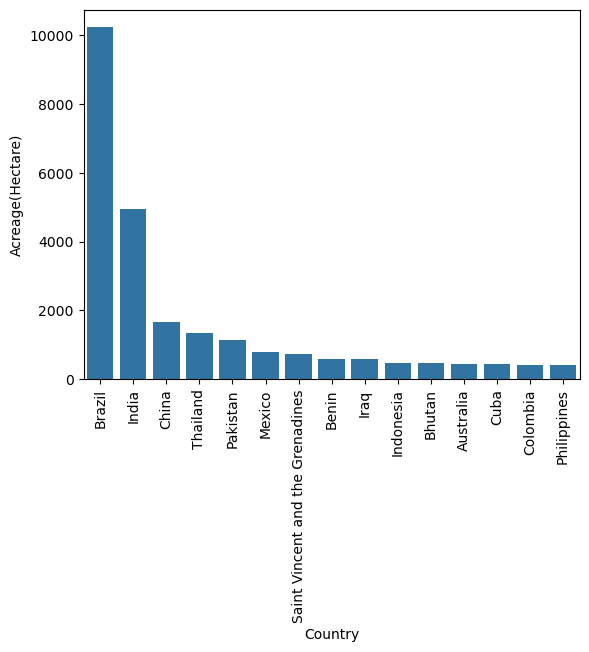

In [402]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

**Which country has highest yield per hectare?**

C:\Users\Infinix\AppData\Local\Temp\ipykernel_10100\2860594357.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


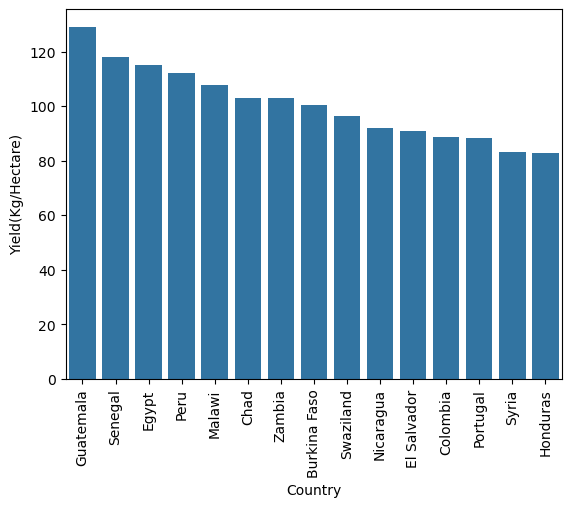

In [405]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

**Which country has highest production?**

C:\Users\Infinix\AppData\Local\Temp\ipykernel_10100\328127327.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


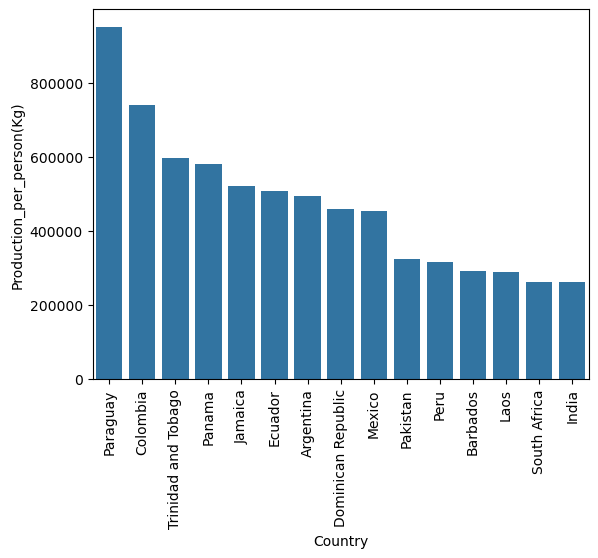

In [408]:
df_yield = df.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

# Correlation


In [415]:
df.corr(numeric_only=True)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.013405,0.993297,0.136326
Production_per_person(Kg),0.013405,1.000000,0.005207,0.185890
Acreage(Hectare),0.993297,0.005207,1.000000,0.092472
Yield(Kg/Hectare),0.136326,0.185890,0.092472,1.000000


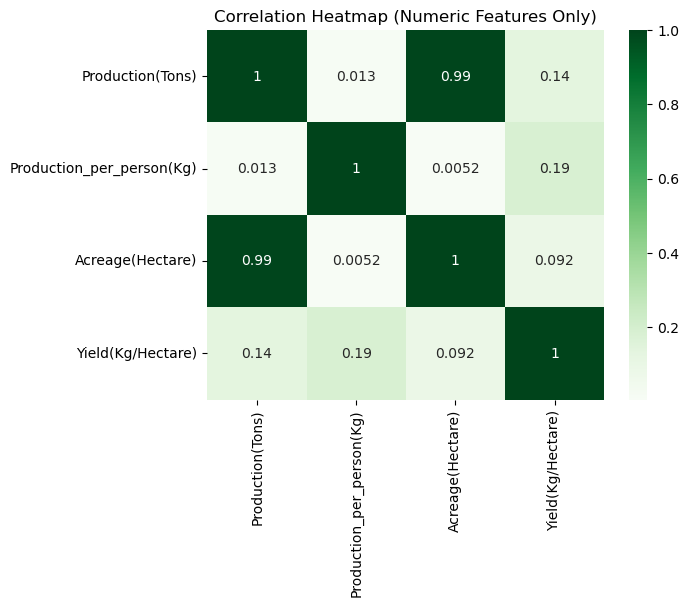

In [427]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap="Greens")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


**Do countries with highest land produce more sugarcane?**

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

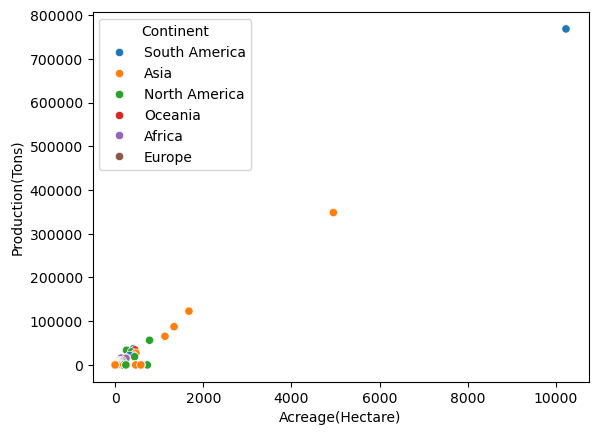

In [430]:
sns.scatterplot(data=df, x='Acreage(Hectare)', y="Production(Tons)", hue='Continent')

**Do countries which yield more sugarcane per hectare produces more sugarcane in total?**

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

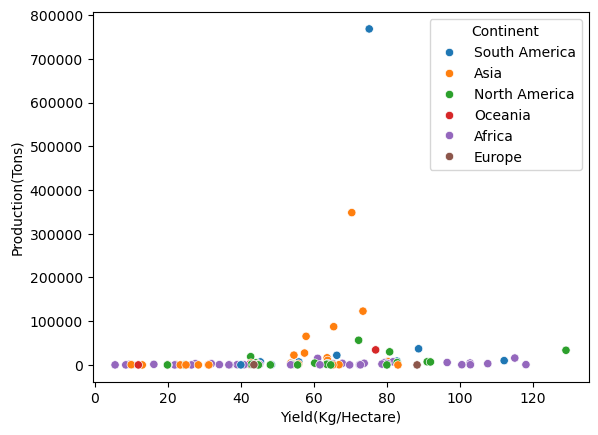

In [433]:
sns.scatterplot(data=df, x="Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

In [437]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678.382,3.668531,10226.205,75.1675
1,India,Asia,348448.000,260721.000000,4950.000,70.3935
2,China,Asia,123059.739,88287.000000,1675.215,73.4591
3,Thailand,Asia,87468.496,1.264303,1336.575,65.4422
4,Pakistan,Asia,65450.704,324219.000000,1130.820,57.8790


# Analysis for Continent


In [445]:
df_continent = df.groupby("Continent").sum()
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89871.030,2.324825e+06,2397.499,2142.1075,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,722994.576,1.856506e+06,12031.921,1226.8164,25
Europe,PortugalSpain,399.429,5.360000e+02,71.000,131.8709,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,174915.027,3.784457e+06,3735.719,1335.7274,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36189.562,2.546413e+04,491.908,162.4191,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865952.149,3.498809e+06,11546.464,732.5337,11


**Which continent produces maximum sugarcane?**

<Axes: xlabel='Continent'>

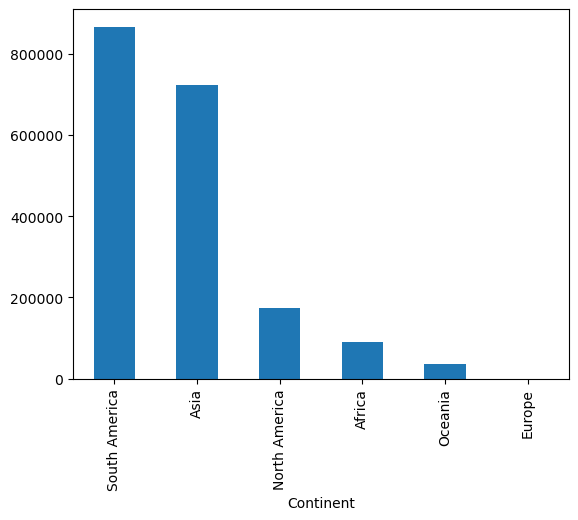

In [448]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")


**Do number of countries in a Continent effects production of sugarcane?**


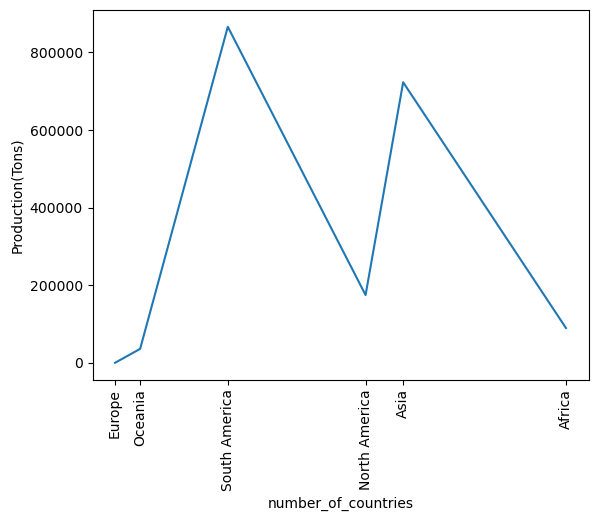

In [451]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

**Do continent with highest land produces more sugarcane?**

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

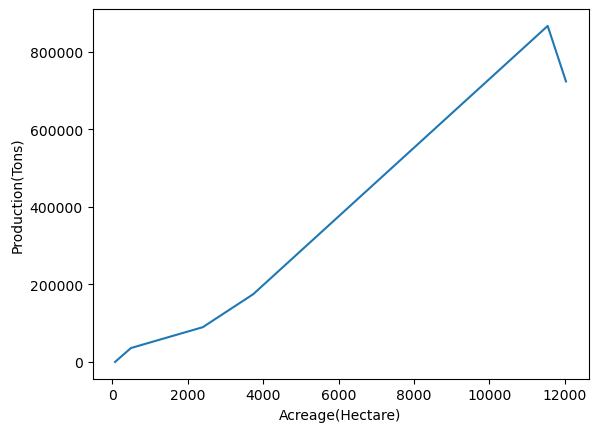

In [454]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )


**Production distribution by continent**

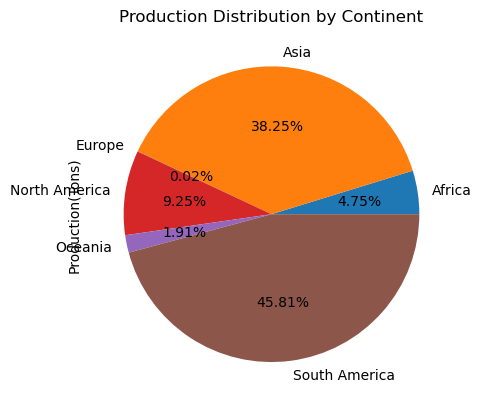

In [457]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

**Correlation for continent**

In [462]:
df_continent.corr(numeric_only=True)


,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.523628,0.984321,0.100975,0.109530
Production_per_person(Kg),0.523628,1.000000,0.554646,0.617144,0.539946
Acreage(Hectare),0.984321,0.554646,1.000000,0.216844,0.237090
Yield(Kg/Hectare),0.100975,0.617144,0.216844,1.000000,0.990224
number_of_countries,0.109530,0.539946,0.237090,0.990224,1.000000
